##### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

##### Reading and displaying the dataset

In [2]:
df = pd.read_csv('MFG10YearTerminationData.csv')
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


##### The above output shows that the columns are mostly categorical.

##### Dropping unnecessary columns

In [3]:
df.drop(['EmployeeID','recorddate_key','birthdate_key','orighiredate_key','terminationdate_key','gender_full','STATUS_YEAR'],axis = 1,inplace = True)

###### We dropped unnecessary columns from the original dataset.

##### Displaying first 5 rows

In [4]:
df.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
0,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
1,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
2,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
3,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
4,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE


###### Above output shows that unnecessary columns are removed.

##### Checking shape of dataset

In [5]:
df.shape

(49653, 11)

##### Checking for missing values in the dataset

In [6]:
df.isnull().sum()

age                  0
length_of_service    0
city_name            0
department_name      0
job_title            0
store_name           0
gender_short         0
termreason_desc      0
termtype_desc        0
STATUS               0
BUSINESS_UNIT        0
dtype: int64

###### Above output shows that there are no missing values in the dataset.

##### Checking statistics of numeric columns

In [7]:
df.describe()

,age,length_of_service,store_name
count,49653.000000,49653.000000,49653.000000
mean,42.077035,10.434596,27.297605
std,12.427257,6.325286,13.514134
min,19.000000,0.000000,1.000000
25%,31.000000,5.000000,16.000000
50%,42.000000,10.000000,28.000000
75%,53.000000,15.000000,42.000000
max,65.000000,26.000000,46.000000


###### The above statistics shows that minimum age of employees is 19 and maximum is 65.

##### Info about dataset columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                49653 non-null  int64 
 1   length_of_service  49653 non-null  int64 
 2   city_name          49653 non-null  object
 3   department_name    49653 non-null  object
 4   job_title          49653 non-null  object
 5   store_name         49653 non-null  int64 
 6   gender_short       49653 non-null  object
 7   termreason_desc    49653 non-null  object
 8   termtype_desc      49653 non-null  object
 9   STATUS             49653 non-null  object
 10  BUSINESS_UNIT      49653 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.2+ MB


###### Above info shows that in the 49653 entries, there are no missing values, 3 columns have integer datatype and 8 columns have object datatype.

##### Checking unique value counts of every column using for loop

In [9]:
for col in df.columns:
    print(df[col].value_counts())
    print('-'*50)

27    1235
29    1227
28    1225
50    1218
30    1212
26    1210
51    1207
25    1197
49    1196
35    1189
34    1188
53    1188
52    1188
48    1180
36    1176
47    1173
55    1168
33    1164
46    1161
54    1159
44    1157
38    1156
56    1154
32    1153
42    1152
43    1150
37    1149
31    1146
39    1142
45    1141
41    1135
58    1130
57    1130
40    1130
59    1128
24    1111
60    1109
23     960
22     815
61     757
62     712
21     703
63     667
64     646
65     593
20     408
19     158
Name: age, dtype: int64
--------------------------------------------------
13    2885
12    2567
8     2559
11    2482
10    2432
9     2381
7     2341
6     2294
3     2270
4     2262
5     2258
2     2257
1     2222
14    2203
15    2192
16    2160
17    2066
0     1962
18    1829
19    1656
20    1322
21    1047
22     830
23     608
24     433
25     121
26      14
Name: length_of_service, dtype: int64
--------------------------------------------------
Vancouver           11

##### Visualizing the percentage of unique values of STATUS column

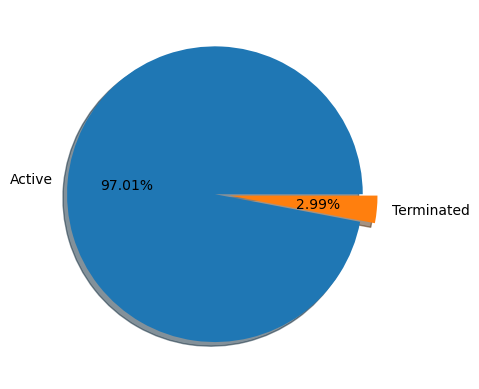

In [10]:
plt.pie(df['STATUS'].value_counts(),labels = ['Active','Terminated'],explode = [0,0.1],shadow = True,autopct = '%0.2f%%')
plt.show()

###### Above pie chart shows that over a span of 10 years, 97.01% of employees were active, while 2.99% were terminated

##### Bivariate analysis of STATUS and BUSINESS UNIT column

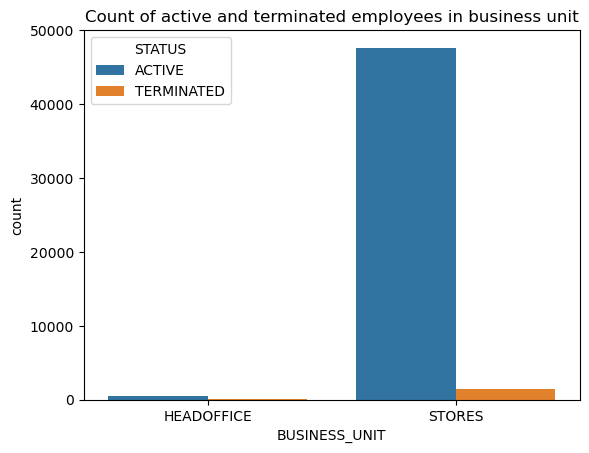

In [11]:
sns.countplot(data = df, x = 'BUSINESS_UNIT',hue = 'STATUS')
plt.title('Count of active and terminated employees in business unit')
plt.show()

###### Above analysis shows that, over a span of 10 years, more employees from the stores unit got terminated as compared to the head office unit.

##### Bivariate analysis of GENDER SHORT and STATUS column

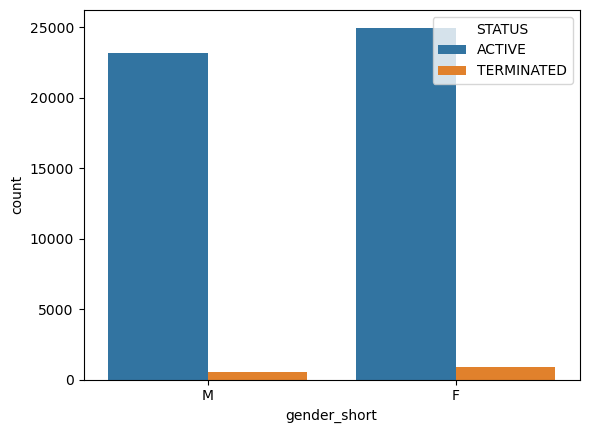

In [12]:
sns.countplot(data = df, x = 'gender_short',hue = 'STATUS')
plt.show()

###### Above analysis shows that more females got terminated as compared to males in a span of 10 years.

##### Bivariate analysis of STATUS and TERMTYPE_DESC column

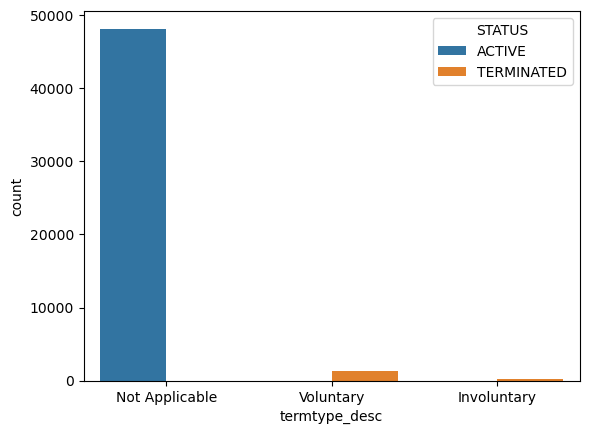

In [13]:
sns.countplot(data = df, x= 'termtype_desc',hue = 'STATUS')
plt.show()

###### Here, the above countplot shows that more employees were terminated voluntarily as compared to other involuntary termination types.

##### Bivariate analysis of STATUS and AGE column

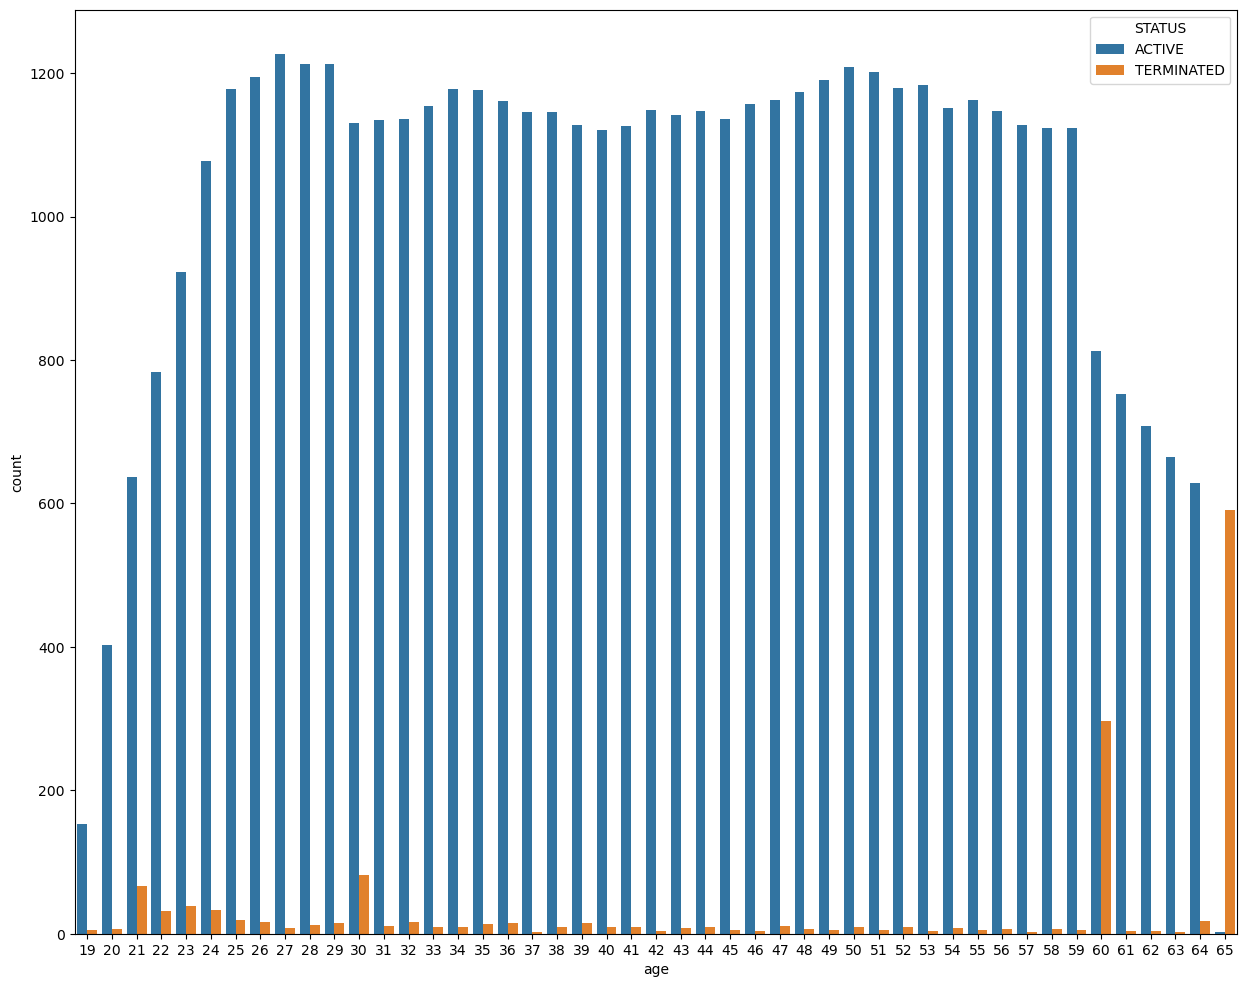

In [14]:
plt.figure(figsize = (15,12))
sns.countplot(data = df, x = 'age',hue = 'STATUS')
plt.show()

###### Above plot reveals more terminations among employees aged 60 and 65, with a larger number of active employees in their mid-twenties and early fifties.

##### Bivariate analysis of STATUS and TERMREASON_DESC column

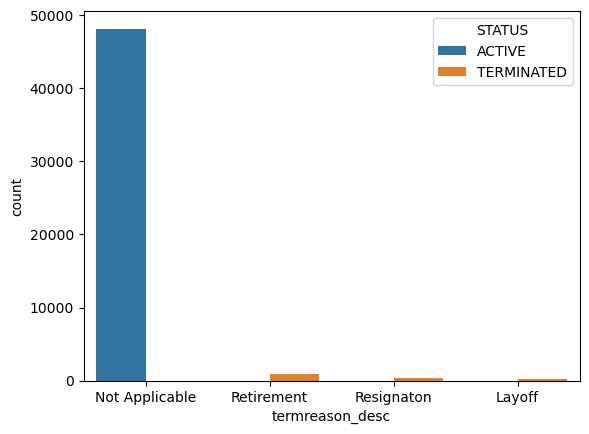

In [15]:
sns.countplot(data = df, x = 'termreason_desc',hue = 'STATUS')
plt.show()

###### Above analysis shows that more employees were terminated due to retirement, followed by resignations, with very few terminated due to layoffs.

##### Bivariate analysis of STATUS and JOB_TITLE column

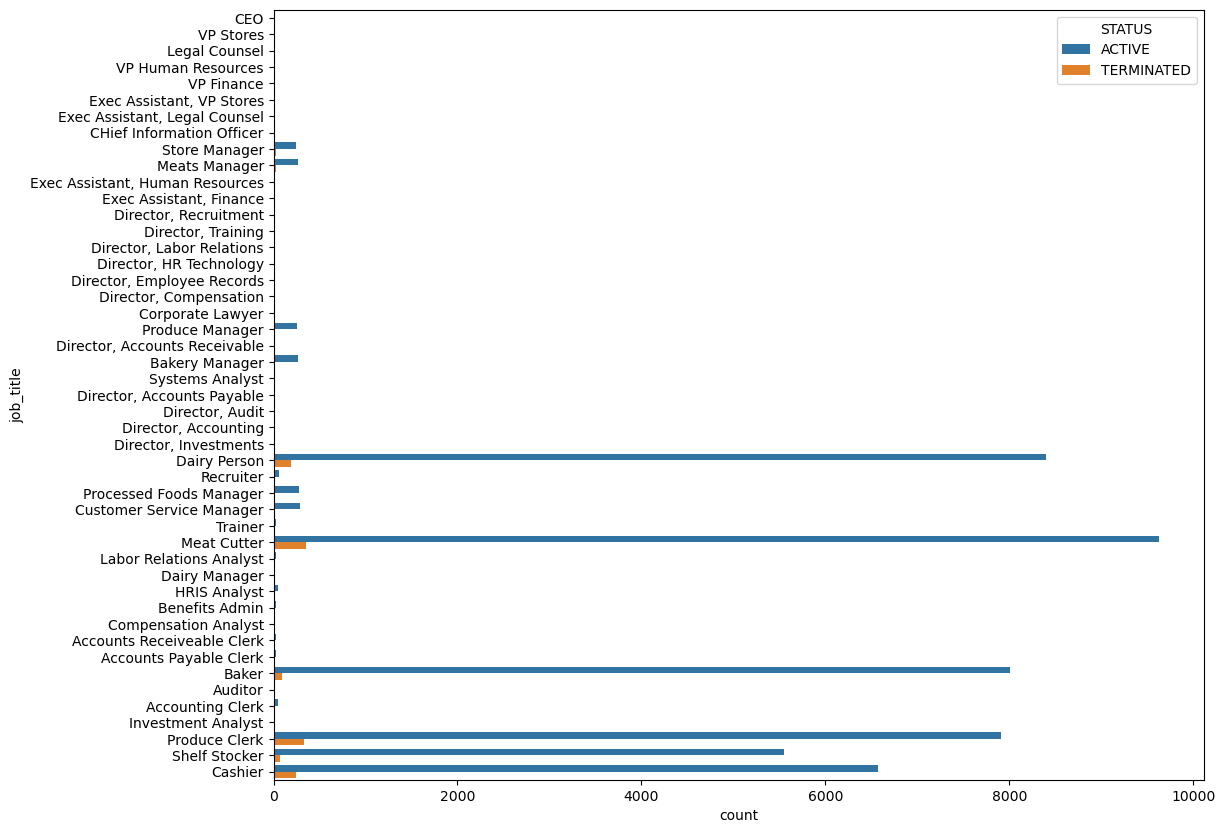

In [16]:
plt.figure(figsize = (12,10))
sns.countplot(data = df, y = 'job_title',hue = 'STATUS')
plt.show()

###### The figure above indicates that over a 10-year period, the most terminations occurred among Meat Cutters, followed by Produce Clerks, Cashiers, and Dairy Personnel. Additionally, Meat Cutters, Bakers, Dairy Personnel, Produce Clerks, Shelf Stockers, and Cashiers had the highest number of active employees.

##### Bivariate analysis of DEPARTMENT_NAME and TERMTYPE_DESC column

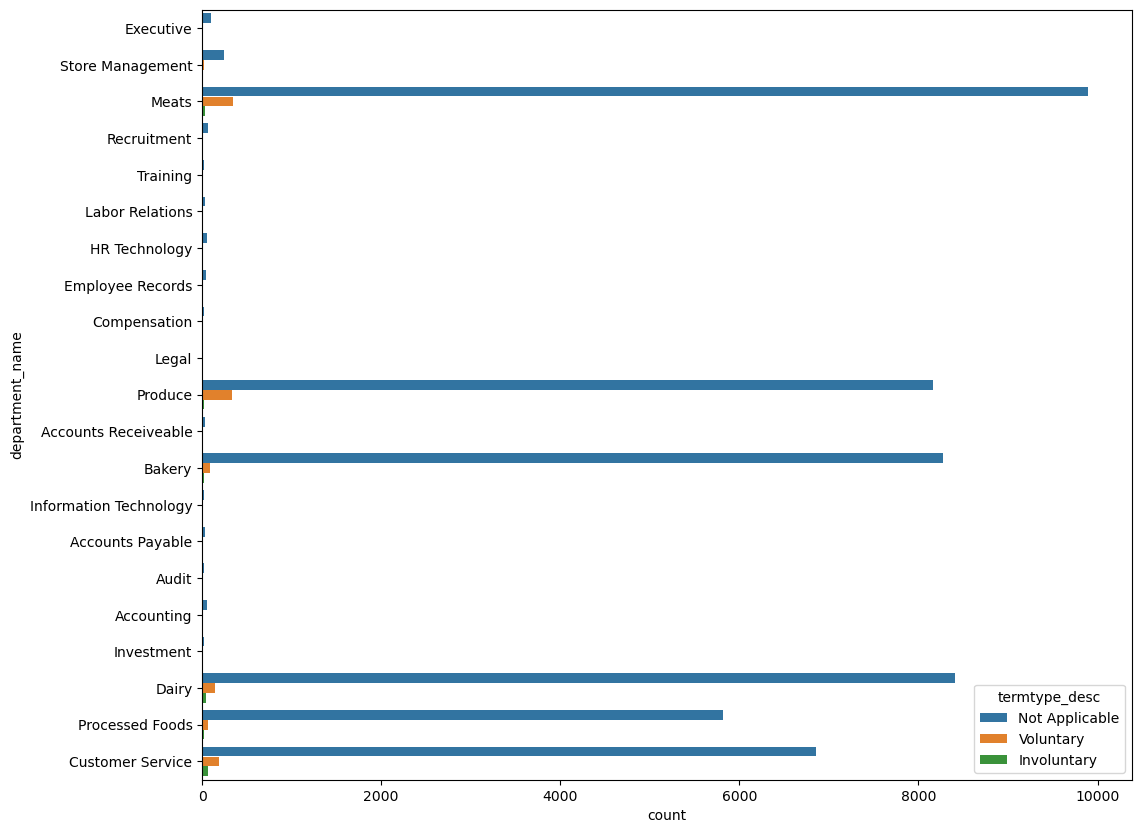

In [17]:
plt.figure(figsize = (12,10))
sns.countplot(data = df, y = 'department_name',hue = 'termtype_desc')
plt.show()

###### The above figure shows that the highest numbers of voluntarily terminated employees are from the Meats department, followed by Produce, Customer Service, and Dairy, while involuntary terminations are primarily in the Dairy and Customer Service departments.

##### Bivariate analysis of DEPARTMENT_NAME and TERMREASON_DESC column

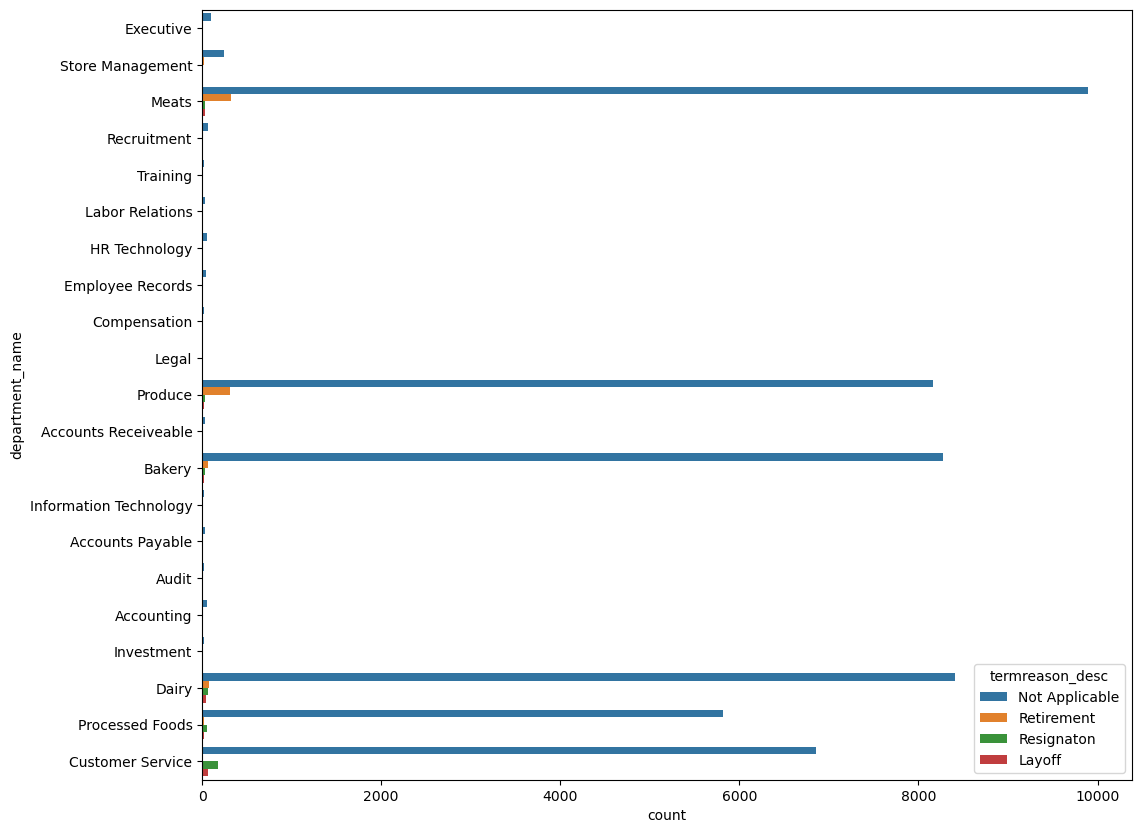

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(data = df, y = 'department_name', hue = 'termreason_desc')
plt.show()

###### The countplot above indicates that more employees retired from the Meats and Produce departments, while most resignations occurred in the Customer Service department.

##### Select the 'object' datatype columns for Categorical Encoding

In [19]:
obj = df.select_dtypes('object').columns
obj

Index(['city_name', 'department_name', 'job_title', 'gender_short',
       'termreason_desc', 'termtype_desc', 'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

##### Apply Label Encoding on categorical columns using 'for'  loop

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj:
    df[col] = le.fit_transform(df[col])

##### Verify categorical columns after label encoding to ensure all columns are encoded.

In [21]:
df.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
0,52,17,34,9,7,35,1,1,1,0,0
1,53,18,34,9,7,35,1,1,1,0,0
2,54,19,34,9,7,35,1,1,1,0,0
3,55,20,34,9,7,35,1,1,1,0,0
4,56,21,34,9,7,35,1,1,1,0,0


##### Check datatype of columns post Label Encoding to make sure every column is converted to integer datatype

In [22]:
df.dtypes

age                  int64
length_of_service    int64
city_name            int32
department_name      int32
job_title            int32
store_name           int64
gender_short         int32
termreason_desc      int32
termtype_desc        int32
STATUS               int32
BUSINESS_UNIT        int32
dtype: object

##### Importing StandardScaler for Data Scaling of features

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
col = df.drop('STATUS',axis = 1).columns
col

Index(['age', 'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'termreason_desc', 'termtype_desc',
       'BUSINESS_UNIT'],
      dtype='object')

##### Performing Data Scaling on the features' columns 

In [24]:
for column in col:
    df[column] = ss.fit_transform(df[[column]])

##### Seperating features and target column

In [25]:
X = df.drop('STATUS',axis = 1)
y = df['STATUS']

##### Splitting of training and testing data

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y , test_size = 0.2, random_state = 5)

##### Importing Sequential model from tensorflow

In [27]:
from tensorflow.keras.models import Sequential

model = Sequential()

##### Creating a neural network using sigmoid activation function 

In [28]:
from tensorflow.keras.layers import Dense

# Here, 'sigmoid' activation function is used because this is classification task

model.add(Dense(10, activation = 'sigmoid'))         
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(40, activation = 'sigmoid'))
model.add(Dense(40, activation = 'sigmoid'))
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

##### Compiling the neural network using adam optimizer, binary crossentropy loss and accuracy metric

In [29]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

##### Training the neural network with 10 epochs

In [30]:
model.fit(xtrain, ytrain, epochs = 10)

Epoch 1/10
1242/1242 [==============================] - 5s 2ms/step - loss: 0.1209 - accuracy: 0.9735
Epoch 2/10
1242/1242 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9959
Epoch 3/10
1242/1242 [==============================] - 3s 3ms/step - loss: 0.0272 - accuracy: 0.9959
Epoch 4/10
1242/1242 [==============================] - 3s 2ms/step - loss: 0.0270 - accuracy: 0.9959
Epoch 5/10
1242/1242 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.9959
Epoch 6/10
1242/1242 [==============================] - 3s 3ms/step - loss: 0.0268 - accuracy: 0.9959
Epoch 7/10
1242/1242 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.9959
Epoch 8/10
1242/1242 [==============================] - 3s 3ms/step - loss: 0.0268 - accuracy: 0.9959
Epoch 9/10
1242/1242 [==============================] - 3s 2ms/step - loss: 0.0267 - accuracy: 0.9959
Epoch 10/10
1242/1242 [==============================] - 3s 2ms/step - loss: 0.026

##### Getting predictions for training data

In [31]:
trainpred = model.predict(xtrain)
trainpred = [0 if i<=0.5 else 1 for i in trainpred]
trainpred[:5]

1242/1242 [==============================] - 2s 1ms/step


[0, 0, 0, 0, 0]

##### Evaluation of model for training data

In [32]:
print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38555
           1       1.00      0.86      0.92      1167

    accuracy                           1.00     39722
   macro avg       1.00      0.93      0.96     39722
weighted avg       1.00      1.00      1.00     39722



##### Getting predictions for testing data

In [33]:
testpred = model.predict(xtest)
testpred = [0 if i<=0.5 else 1 for i in testpred]
testpred[:5]

311/311 [==============================] - 1s 2ms/step


[0, 0, 0, 0, 0]

##### Evaluation of model for testing data

In [34]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9613
           1       1.00      0.84      0.91       318

    accuracy                           0.99      9931
   macro avg       1.00      0.92      0.96      9931
weighted avg       0.99      0.99      0.99      9931

